# Chargement des 3 datasets HuggingFace

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import os
from datasets import load_from_disk
import matplotlib.pyplot as plt

# Chemin pour charger les datasets
results_dir = '/content/drive/MyDrive/formation Datascientest/RVL-CDIP/'

# Charger les datasets enregistrés
train_dataset = load_from_disk(os.path.join(results_dir, 'train_dataset'))
test_dataset = load_from_disk(os.path.join(results_dir, 'test_dataset'))
val_dataset = load_from_disk(os.path.join(results_dir, 'val_dataset'))

# Fonction pour afficher un échantillon d'images
def show_sample(dataset, sample_size=20):
    sample = dataset.shuffle(seed=42).select(range(sample_size))
    fig, axes = plt.subplots(4, 5, figsize=(15, 10))
    for i, (image, label) in enumerate(zip(sample['image'], sample['label'])):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Loading dataset from disk:   0%|          | 0/78 [00:00<?, ?it/s]

In [ ]:
# Afficher un échantillon de 20 images pour chaque dataset
print("Train Dataset Sample:")
show_sample(train_dataset)

print("Test Dataset Sample:")
show_sample(test_dataset)

print("Validation Dataset Sample:")
show_sample(val_dataset)

Output hidden; open in https://colab.research.google.com to view.

Test Dataset Sample:


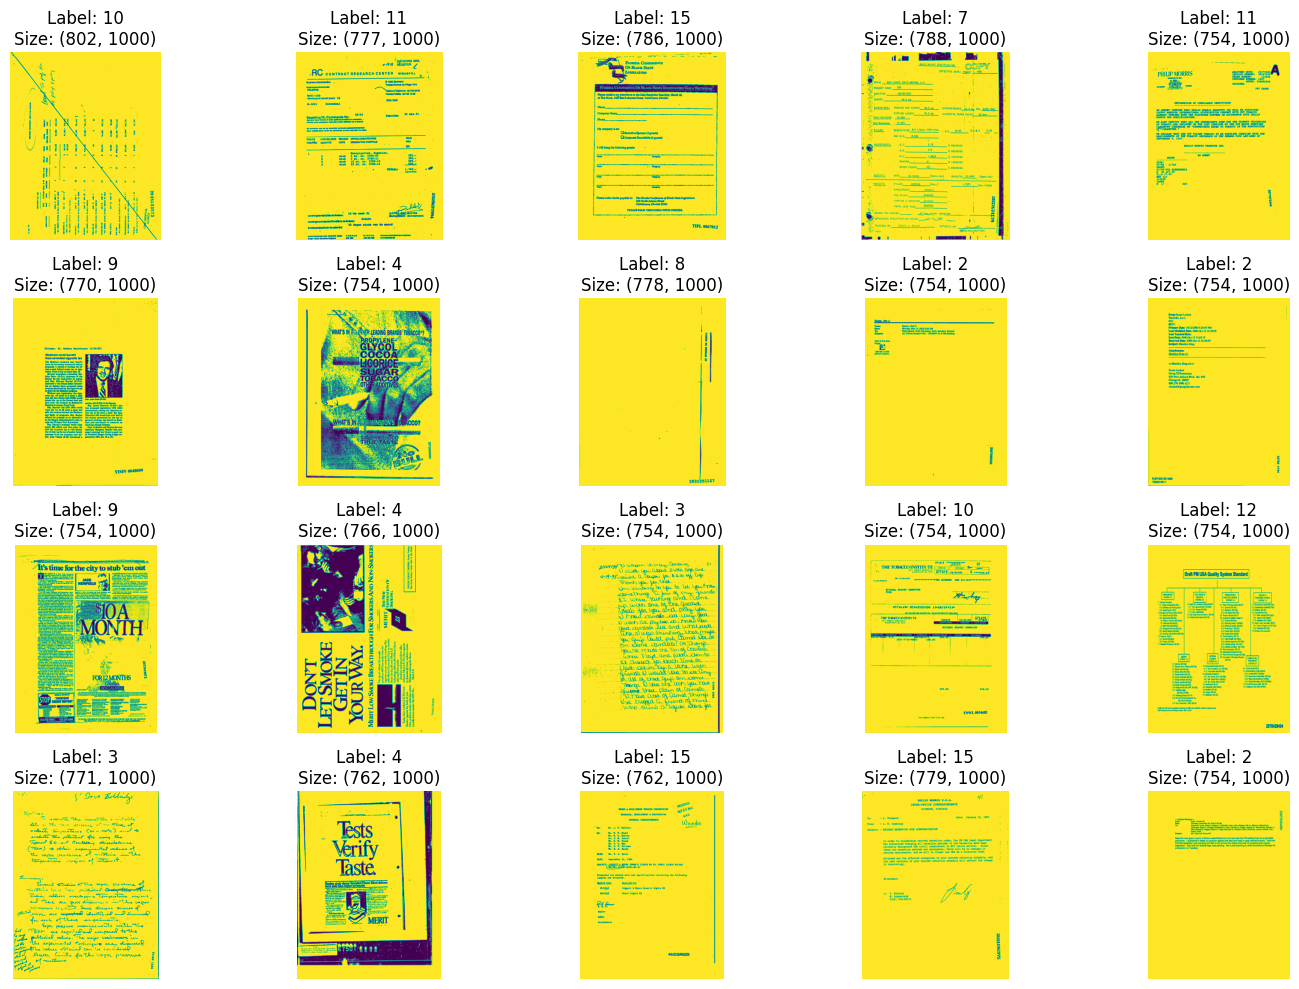

In [ ]:
# prompt: affiche la taille des images tirré d'un sample de 20 images du dataset test_dataset

import matplotlib.pyplot as plt
def show_sample(dataset, sample_size=20):
    sample = dataset.shuffle(seed=42).select(range(sample_size))
    fig, axes = plt.subplots(4, 5, figsize=(15, 10))
    for i, (image, label) in enumerate(zip(sample['image'], sample['label'])):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(f"Label: {label}\nSize: {image.size}") # Ajout de la taille de l'image
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print("Test Dataset Sample:")
show_sample(test_dataset)


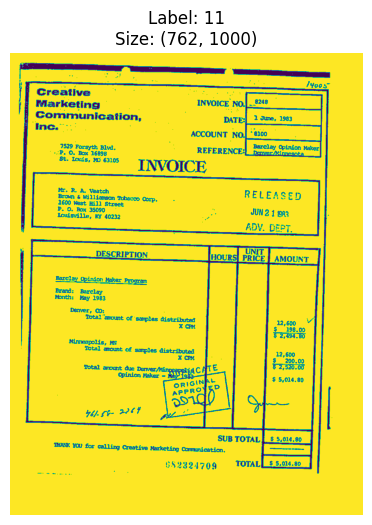

In [ ]:
# prompt: affiche une seul image afin que je vérifie sa qualité

import matplotlib.pyplot as plt

def show_single_image(dataset, index=0):  # Vous pouvez changer l'index pour afficher une autre image
    image = dataset[index]['image']
    label = dataset[index]['label']

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f"Label: {label}\nSize: {image.size}")
    plt.axis('off')
    plt.show()

show_single_image(train_dataset)


# Test de dataviz sur le test

In [ ]:
#!pip install seaborn

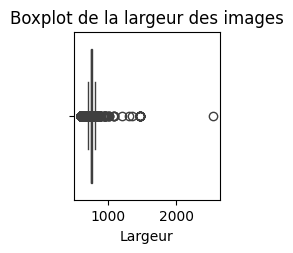

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, UnidentifiedImageError
import io

#  Convertir la colonne 'image' du dataset en une liste de largeurs
test_dataset = test_dataset.select([i for i in range(len(test_dataset)) if i != 33669])
widths = []
for image in test_dataset['image']:
  try:
    # Directly access the image width using the 'width' attribute
    widths.append(image.width)
  except UnidentifiedImageError:
    pass

plt.subplot(2, 3, 1)
sns.boxplot(x=widths)
plt.title('Boxplot de la largeur des images')
plt.xlabel('Largeur')
plt.show()

# Ajout d'un ID unique

In [ ]:
import uuid
import os
from datasets import load_from_disk

def ajouter_identifiant(exemple, idx):
    exemple['image_ID'] = str(uuid.uuid4())
    return exemple

# val_dataset = val_dataset.map(ajouter_identifiant, with_indices=True)
# val_dataset.save_to_disk(os.path.join(results_dir, 'val_dataset_ID'))

train_dataset = train_dataset.map(ajouter_identifiant, with_indices=True)
train_dataset.save_to_disk(os.path.join(results_dir, 'train_dataset_ID'))

Map:   0%|          | 0/320000 [00:00<?, ? examples/s]

Saving the dataset (0/78 shards):   0%|          | 0/320000 [00:00<?, ? examples/s]

In [3]:
import uuid
import os
from datasets import load_from_disk
def ajouter_identifiant(exemple, idx):
    exemple['image_ID'] = str(uuid.uuid4())
    return exemple
results_dir = '/content/drive/MyDrive/formation Datascientest/RVL-CDIP/'
test_dataset = load_from_disk(os.path.join(results_dir, 'test_dataset'))
# val_dataset = val_dataset.map(ajouter_identifiant, with_indices=True)
# val_dataset.save_to_disk(os.path.join(results_dir, 'val_dataset_ID'))

test_dataset = test_dataset.map(ajouter_identifiant, with_indices=True)
test_dataset.save_to_disk(os.path.join(results_dir, 'test_dataset_ID'))

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Saving the dataset (0/10 shards):   0%|          | 0/40000 [00:00<?, ? examples/s]